**Please fo through Regression Case study 1 and 2 Prior before starting with this code.**

**It contains data cleaning, Data visualization, Data preprocessing and Analysis which forms the base for understanding the base of this code**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [12]:
cars_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarsSampled/cars_sampled.csv")
cars = cars_data.copy()

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


**Removing Insignificant columns**

In [14]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis= 1)

cars.drop_duplicates(keep = 'first', inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


**Subsetting only the significant Data**

In [15]:
cars = cars[
    (cars["yearOfRegistration"] <= 2018)
    &(cars["yearOfRegistration"] >= 1950)
    &(cars["price"] >= 100)
    &(cars["price"] <= 150000)
    &(cars["powerPS"] >= 10)
    &(cars["powerPS"] <= 500)
]
# Approx 6700 records are dropped

In [16]:
cars['Age'] = (2018 - cars['yearOfRegistration']) + ((cars['monthOfRegistration'])/12)
cars["Age"] = round(cars["Age"], 2)
cars['Age'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

*Further Dropping insignificant variables*

In [17]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'])

In [18]:
## Correlation Among Numeric Variables

cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
print(round(correlation,3))
print(cars_select1.corr().loc[:,'price'].abs().sort_values(ascending  = False))

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000
price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64


## Actual code of this Session
We are going to build a linear regression and random forest regression model on 2 sets of data
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the misssing values

## ==== 1. Linear Regression Model Omitting the missing values ====

In [19]:
cars_omit = cars.dropna(axis = 0)
# Approx 10000 records removed

#### converting categorical variables into dummy variables

In [20]:
cars_omit = pd.get_dummies(cars_omit, drop_first = True)

### ===== Building model with the omitted data =====
#### separating input and output variables

In [21]:
x1 = cars_omit.drop(['price'], axis= 1, inplace = False)
y1 = cars_omit['price']

#### plotting the variable price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2b09eae10>,
      dtype=object)

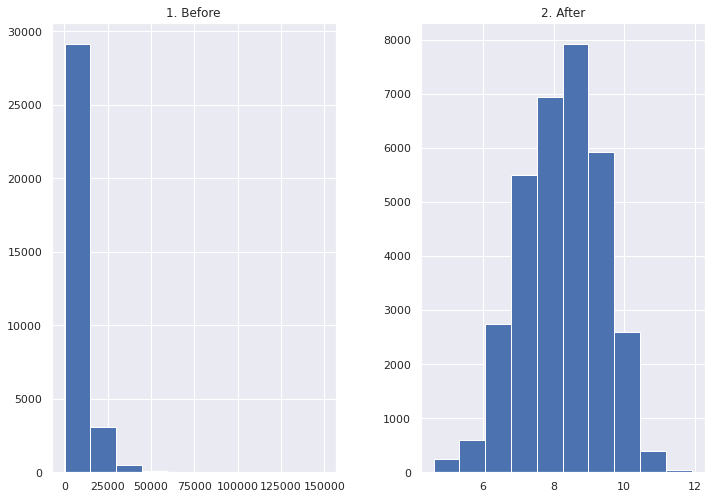

In [23]:
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()

1. for histogram for log(prices)... it is nicely bell shaped
2. for histogram for simply prices... it is a skewed graph

so it is better to go further with natural log of prices and not just with price

So, we will be regressing the natural logarithm of prices with the input features

#### Transforming price as a Logarthmic value

In [24]:
y1 = np.log(y1)

#### Splitting the data into test and train

In [26]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 28)
print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)

(26307, 302) (6577, 302) (26307,) (6577,)


### Baseline Model for the Omitted Data
In baseline model the predicted value is replaced by the mean value of the test data

We are making a base model by using test data mean value

This is to set a benchmark and to compare with our regression model

inshort... setting the base value (base metric)

#### finding mean for test data value

In [27]:
base_pred_1 = np.mean(Y_test1)
print(base_pred_1)

8.215867183883187


#### Repeating the same value till the length of test data

In [28]:
base_pred_1 = np.repeat(base_pred_1, len(Y_test1))

#### Finding RMSE (Root Mean Square Error)
1. it computes the difference between test value and predicted value .... squares them... and divides by the no. of observations
2. this is the mean squared error
3. when you take the squareroot of mean squared error... you get RMSE value

In [30]:
base_root_mean_square_error_1 = np.sqrt(mean_squared_error(Y_test1, base_pred_1))
print(base_root_mean_square_error_1)

1.1462960922879677


## Linear Regression with Omitted Data

In [34]:
lnr = LinearRegression(fit_intercept = True)

#### model

In [35]:
model_lin1 = lnr.fit(X_train1, Y_train1)

In [36]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"Linear Regression Accuracy Score for training set (Omitting missing values): {r2_lin_train1}\n\
Linear Regression Accuracy Score for testing set (Omitting missing values): {r2_lin_test1}")

Linear Regression Accuracy Score for training set (Omitting missing values): 0.7765127399891663
Linear Regression Accuracy Score for testing set (Omitting missing values): 0.7763185741323453


#### Predicting model on test set

In [37]:
cars_predictions_lin1 = lnr.predict(X_test1)

#### calculating MSE and RMSE for predictions


In [38]:
lin_mse1 = mean_squared_error(Y_test1, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.542140401608484



it should be noted that the RMSE valus has dropped from 1.14 to 0.54 (Approx 50% reduction)

R squared value
it helps to tell you how good is your model able to explain the variability in 'Y'

In [39]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"r2_lin1_train1: {r2_lin_train1}\nr2_lin1_test1: {r2_lin_test1}")

r2_lin1_train1: 0.7765127399891663
r2_lin1_test1: 0.7763185741323453


R sq. value for train set is 0.7765 and R sq. value for test set is 0.7763

cutting quite close... train set is definitely better... but the test set is not far behind

This tells that our model is good

As much as variability the model was able to capture in the train data...it is able to capture the same amount of variability (if not more) in the test data as well.

## Random Forest regressor using omitted data
### Parameters


#### n_estimators: 'int' (def 100)
Number of trees in the forest
#### min_samples_split: 'int' or 'float' (def 2)
Minimum No. of samples required to split an internal node
#### min_samples_leaf: int or float (def 1)
Minimum No. of samples required to be at a leaf node. A split point will be considered only if it leaves at least (Min_samples_leaf) training samples in each of left and right branches

#### max_features: {'auto', 'sqrt', 'log'}, int, float  (def 'auto')
No. of features to be considered to build the model
1. if 'auto', then max_features = n_features (chooses the features automatically)
2. if 'sqrt', then max_features = sqrt(n_features)
3. if 'log', then max_features = log(n_features)
4. if int, then consider (int) features at each split

#### max_depth: int (def None)
The maximum depth of the tree. If None, nodes are expanded untill all leaves are pure or until all leaves contain less than min_samples_split

#### criterion: {'mse', 'mae'} (def: 'mse')
#### random_state: int
it is a predefined algorithm for randomizer.... if not specified, it will take different data sets everytime

In [40]:
rf = RandomForestRegressor(n_estimators = 100,
                          max_features = 'auto',
                          max_depth = 100,
                          min_samples_split = 10,
                          min_samples_leaf = 4,
                          random_state = 1)

#### model

In [41]:
model_rf1 = rf.fit(X_train1, Y_train1)

In [42]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"Random Forest Accuracy Score for training set (Omitting missing values): {r2_rf_train1}\n\
Random Forest Accuracy Score for testing set (Omitting missing values): {r2_rf_test1}")

Random Forest Accuracy Score for training set (Omitting missing values): 0.919533427107709
Random Forest Accuracy Score for testing set (Omitting missing values): 0.8640050736764158


#### Predicting model on test set

In [43]:
cars_predictions_rf1 = rf.predict(X_test1)

#### Computing MSE and RMSE values

In [45]:
rf_mse1 = mean_squared_error(Y_test1, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.422725225954634


Thus, it should be noted that Random Forest model is performing better than the Linear regression model as the RMSE model has come down further

#### R squared value

In [46]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"r2_rf_train1: {r2_rf_train1}\nr2_lin1_test1: {r2_rf_test1}")

r2_rf_train1: 0.919533427107709
r2_lin1_test1: 0.8640050736764158


# FINAL OUTPUT

In [47]:
# FOR OMITTED DATA
print(f"Metrics for models built from data where missing values were omitted")
print(f"Base RMSE value = {base_root_mean_square_error_1}")
print(f"RMSE value for linear Regression model = {lin_rmse1}")
print(f"RMSE value for Random Forest model = {rf_rmse1}")
print(f"Accuracy Score for training set from linear regression = {r2_lin_train1}")
print(f"Accuracy Score for testing set from linear regression = {r2_lin_test1}")
print(f"Accuracy Score for training set from random forest regressor = {r2_rf_train1}")
print(f"Accuracy Score for testing set from random forest regressor = {r2_rf_test1}")

Metrics for models built from data where missing values were omitted
Base RMSE value = 1.1462960922879677
RMSE value for linear Regression model = 0.542140401608484
RMSE value for Random Forest model = 0.422725225954634
Accuracy Score for training set from linear regression = 0.7765127399891663
Accuracy Score for testing set from linear regression = 0.7763185741323453
Accuracy Score for training set from random forest regressor = 0.919533427107709
Accuracy Score for testing set from random forest regressor = 0.8640050736764158
